In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [4]:
# Load file
filename='/content/drive/MyDrive/employee_attrition.csv'
employee=pd.read_csv(filename)
employee.set_index('EmployeeNumber')    # set the employee number column as index
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Check datatypes and missing values
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# EDA

Missing values

In [5]:
employee.Gender.value_counts(dropna=False)

NaN       882
Female    588
Name: Gender, dtype: int64

In [6]:
# Based on the above findings, there are many missing values in the Gender column and there is no data for male
# Try to find some patterns like which department or jobrole has more missing values 
employee.groupby(['Department'])['Gender'].value_counts(dropna=False)

Department              Gender
Human Resources         NaN        43
                        Female     20
Research & Development  NaN       582
                        Female    379
Sales                   NaN       257
                        Female    189
Name: Gender, dtype: int64

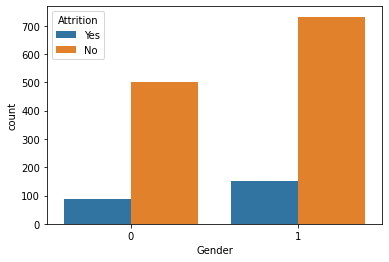

In [7]:
# see if there is a difference in attrition between female and the missing values group
employee_df=employee.copy()
employee_df['Gender']=np.where(employee_df['Gender'].isna(),1,0)
sns.countplot(x=employee_df['Gender'], hue=employee_df['Attrition'], data=employee_df)

In [8]:
# Replace missing values with unknown
employee['Gender']=employee['Gender'].fillna('Unknown')

In [9]:
# Check to see if there is any NaNs
employee.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Data Visualization

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


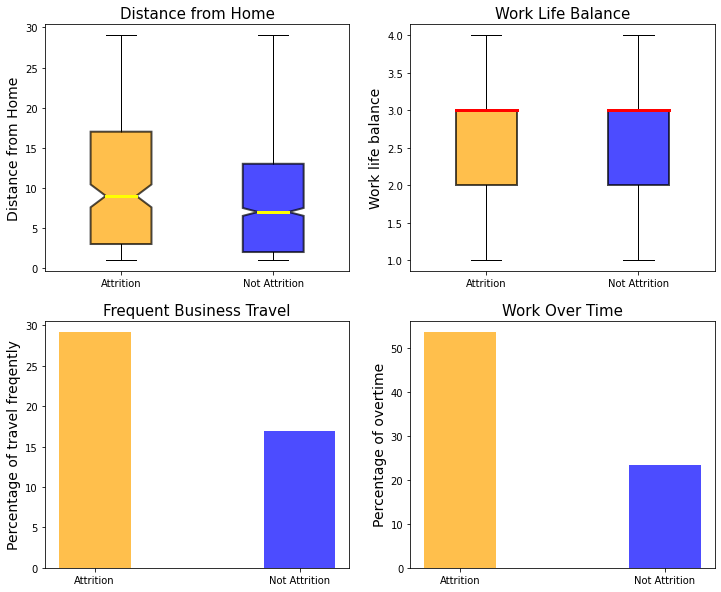

In [10]:
# Distance from work,worklife balance,travel and overtime are all related to work-life balance,hence put them together as one aspect

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))

# Create boxplot to compare distance from work between attrition group and not attrition group
dis_a=employee[employee['Attrition']=='Yes']['DistanceFromHome']
dis_na=employee[employee['Attrition']=='No']['DistanceFromHome']
boxes=axes[0,0].boxplot([dis_a,dis_na],labels=['Attrition','Not Attrition'],notch=True,patch_artist=True,widths=0.4,
                  medianprops=dict(linestyle='-',linewidth=3,color='yellow'),
                  boxprops=dict(linestyle='--',linewidth=2,color='black',facecolor='blue',alpha=0.7))
boxes['boxes'][0].set_facecolor('orange')
axes[0,0].set_title('Distance from Home',fontsize=15)   
axes[0,0].set_ylabel('Distance from Home',fontsize=14);


# Create boxplot to see if there is a difference in work life balance score between the two groups
wlb_a=employee[employee['Attrition']=='Yes']['WorkLifeBalance']
wlb_na=employee[employee['Attrition']=='No']['WorkLifeBalance']
boxplots=axes[0,1].boxplot([wlb_a,wlb_na],labels=['Attrition','Not Attrition'],patch_artist=True,widths=0.4,
                  medianprops=dict(linestyle='-',linewidth=3,color='Red'),
                  boxprops=dict(linestyle='--',linewidth=2,color='black',facecolor='blue',alpha=0.7))
boxplots['boxes'][0].set_facecolor('orange')
axes[0,1].set_title('Work Life Balance',fontsize=15)   
axes[0,1].set_ylabel('Work life balance',fontsize=14);


# Create barplot to compare the percentage of employees with frequent travel between the two groups
# Get # of employees for each travel frequency for the two groups
travel=employee.groupby(['Attrition','BusinessTravel'])[['EmployeeNumber']].count()  
# Convert count to percentage of employees for each travel frequency category within each group (refernce,https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby)
travel_percent=travel.groupby(level=0).apply(lambda x:x*100/x.sum()).reset_index() 
travel_percent.rename(columns={'EmployeeNumber':'Percentage of employees'},inplace=True)
travel_percent.sort_values(by='Attrition',ascending=False,inplace=True) # Put attrition group first 
# get only the percentage of travel_frequently for each group and plot
axes[1,0].bar(travel_percent[travel_percent['BusinessTravel']=='Travel_Frequently']['Attrition'],  
              travel_percent[travel_percent['BusinessTravel']=='Travel_Frequently']['Percentage of employees'],
              width=0.35,color=['orange','blue'],alpha=0.7)
axes[1,0].set_xticklabels(['Attrition','Not Attrition'])
axes[1,0].set_ylabel('Percentage of travel freqently',fontsize=14)
axes[1,0].set_title('Frequent Business Travel',fontsize=15)


# create barplot to compare overtime between the two groups
# count # of employees in each overtime category for each group
overtime=employee.groupby(['Attrition','OverTime'])[['EmployeeNumber']].count() 
# convert to percentage
overtime_percentage=overtime.groupby(level=0).apply(lambda x:x*100/x.sum()).reset_index() 
overtime_percentage.rename(columns={'EmployeeNumber':'Percentage of Over Time'},inplace=True)
overtime_percentage.sort_values(by='Attrition',ascending=False,inplace=True)
# get only the percentage of employees who work overtime(overtime=yes) for each group and plot
axes[1,1].bar(overtime_percentage[overtime_percentage['OverTime']=='Yes']['Attrition'], 
              overtime_percentage[overtime_percentage['OverTime']=='Yes']['Percentage of Over Time'],width=0.35,color=['orange','blue'],alpha=0.7)
axes[1,1].set_xticklabels(['Attrition','Not Attrition'])
axes[1,1].set_ylabel('Percentage of overtime',fontsize=14)
axes[1,1].set_title('Work Over Time',fontsize=15);
plt.savefig('worklifebalance.png', dpi = 300)

Insights: From the graphs, there is a difference in distance from home between attrition and not attrition group. The median distance from home is higher in attrition group. The percentage of employees who travel frequently and who work overtime are both higher in attrition group. 

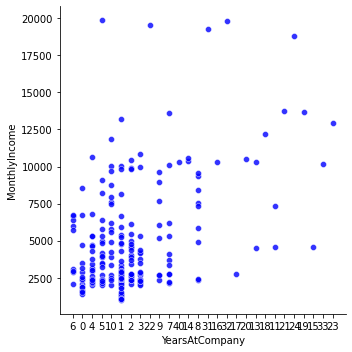

In [11]:
# Create relplot to show relationship among attrition, monthly income and years at company and
employee_a=employee[employee['Attrition']=='Yes'] # Only show attrition group
sns.relplot(data=employee_a,x='YearsAtCompany',y='MonthlyIncome',color=['blue'],alpha=0.8);
plt.tight_layout()
plt.savefig('Income1.png', dpi = 300)

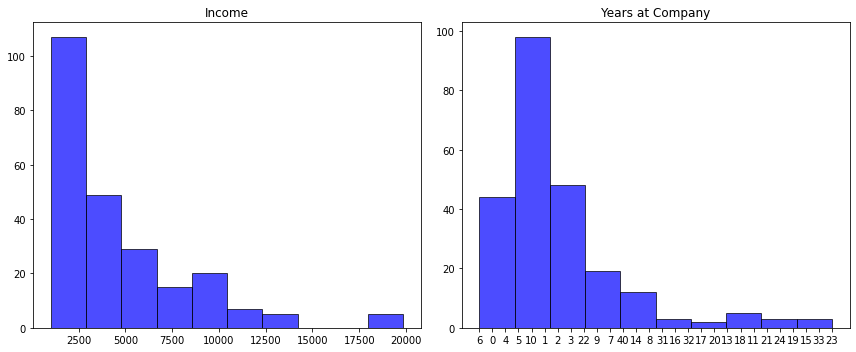

In [12]:
# Create histograms to see more clearly that which income and years at company group has the highest staff attrition
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(employee_a['MonthlyIncome'],edgecolor='k',color='blue',alpha=0.7)
plt.title('Income')

plt.subplot(1,2,2)
plt.hist(employee_a['YearsAtCompany'],edgecolor='k',color='blue',alpha=0.7)
plt.title('Years at Company')

plt.tight_layout()
plt.savefig('Income2.png', dpi = 300)

Insights: It was found from the seaborn relplot that more employee attrition occurs in low monthly income group, and also among new employees. The histograms gives closer view that high employee attrition occurs among employees with income level of 2500 or lower. High employee attrition also occurs among employees who work for the company for less than 5 years.

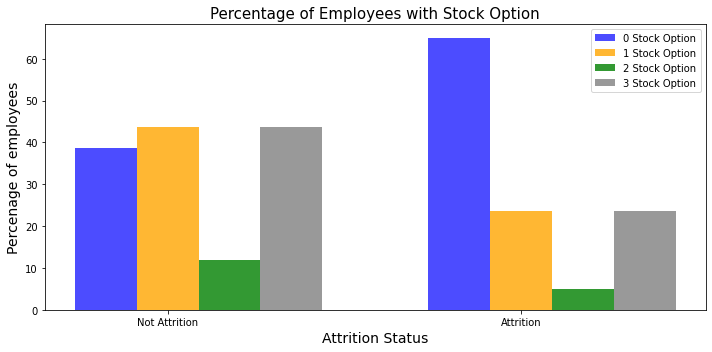

In [13]:
# Show comparison of stock option between attrition and not attrition group

# Get the count of employees for each stock level category for each group
employee_stock=employee.groupby(['Attrition','StockOptionLevel'])[['EmployeeNumber']].count()
employee_stock.rename(columns={'EmployeeNumber':'Percent'},inplace=True)
# Convert count to percentage of employees with a certain stock option level within the group
stock_percent=employee_stock.groupby(level=0).apply(lambda x: x*100/x.sum()).reset_index()

# Create bar graph for each stock option level for attrition and not attrition group
x=np.arange(0,2) # x axis
width=0.35

plt.figure(figsize=(10,5))
plt.bar(x-width/2,stock_percent[stock_percent['StockOptionLevel']==0]['Percent'],width=width/2,label='0 Stock Option',color='Blue',alpha=0.7)
plt.bar(x,stock_percent[stock_percent['StockOptionLevel']==1]['Percent'],width=width/2,label='1 Stock Option',color='orange',alpha=0.8)
plt.bar(x+width/2,stock_percent[stock_percent['StockOptionLevel']==2]['Percent'],width=width/2,label='2 Stock Option',color='green',alpha=0.8)
plt.bar(x+width,stock_percent[stock_percent['StockOptionLevel']==1]['Percent'],width=width/2,label='3 Stock Option',color='grey',alpha=0.8)

plt.xticks(x,['Not Attrition','Attrition'])
plt.title('Percentage of Employees with Stock Option',fontsize=15)
plt.ylabel('Percenage of employees',fontsize=14)
plt.xlabel('Attrition Status',fontsize=14)
plt.legend()

plt.tight_layout()
plt.savefig('Stock', dpi = 300)

Insights: The percentage of staff with 0 stock option level is much higher in attrition group compared with not attrition group.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


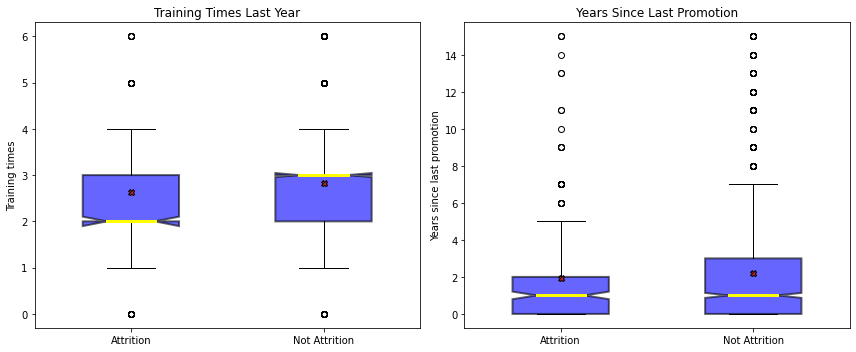

In [14]:
# Difference of career development oppportunities (training and promotion) between attrition and not attrition group

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
# Create boxplot for training times for each group
axes[0].boxplot([employee[employee['Attrition']=='Yes']['TrainingTimesLastYear'],
                 employee[employee['Attrition']=='No']['TrainingTimesLastYear']],labels=['Attrition','Not Attrition'],notch=True,widths=0.5,
                patch_artist=True,medianprops=dict(linestyle='-',linewidth=3,color='Yellow'),showmeans=True, 
                meanprops =dict(marker='X', markeredgecolor='black',markerfacecolor='firebrick'),
                boxprops=dict(linestyle='--',linewidth=2,color='k',facecolor='blue',alpha=0.6)
                )
axes[0].set_title('Training Times Last Year')
axes[0].set_ylabel('Training times')

# Create boxplot for years since last promotion for each group
axes[1].boxplot([employee[employee['Attrition']=='Yes']['YearsSinceLastPromotion'],
                 employee[employee['Attrition']=='No']['YearsSinceLastPromotion']],labels=['Attrition','Not Attrition'],notch=True,widths=0.5,
                patch_artist=True,medianprops=dict(linestyle='-',linewidth=3,color='Yellow'),showmeans=True, 
                meanprops =dict(marker='X', markeredgecolor='black',markerfacecolor='firebrick'),
                boxprops=dict(linestyle='--',linewidth=2,color='k',facecolor='blue',alpha=0.6)
                );
axes[1].set_title('Years Since Last Promotion')
axes[1].set_ylabel('Years since last promotion')

plt.tight_layout()
plt.savefig('career', dpi = 300)

Insights: Training times last year is lower in attrition group compared with not attrition group

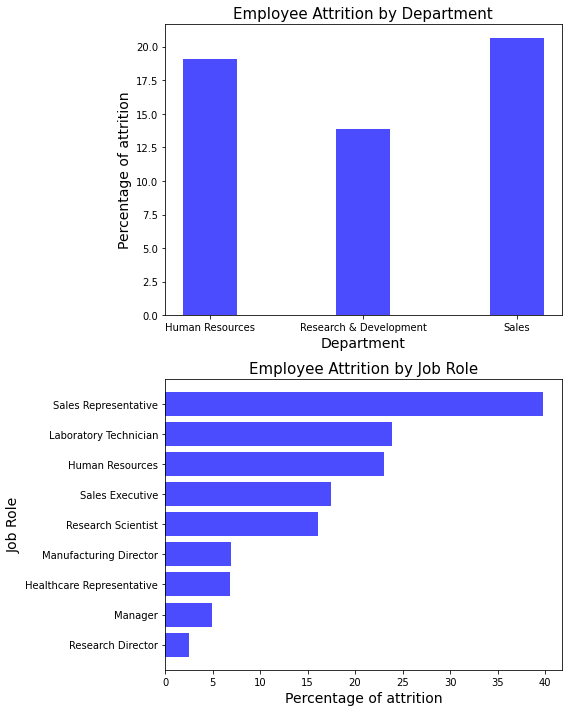

In [15]:
# Compare employee attrition among departments

# Get the count of employees for each department in each group
employee_dept=employee.groupby(['Department','Attrition'])[['EmployeeNumber']].count()
employee_dept.rename(columns={'EmployeeNumber':'Percent'},inplace=True)
# convert count to percentage
employee_dept=employee_dept.groupby(level=0).apply(lambda x: x*100/x.sum()).reset_index()

plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.bar(employee_dept[employee_dept['Attrition']=='Yes']['Department'],employee_dept[employee_dept['Attrition']=='Yes']['Percent'],width=0.35,color='blue',alpha=0.7)
plt.xlabel('Department',fontsize=14)    
plt.ylabel('Percentage of attrition',fontsize=14)   
plt.title('Employee Attrition by Department',fontsize=15)

# Get the count of employees for each role in each group
employee_role=employee.groupby(['JobRole','Attrition'])[['EmployeeNumber']].count()
employee_role.rename(columns={'EmployeeNumber':'Percent'},inplace=True)
# Convert count to percentage
employee_role=employee_role.groupby(level=0).apply(lambda x: x*100/x.sum()).reset_index().sort_values(by='Percent')

plt.subplot(2,1,2)
plt.barh(employee_role[employee_role['Attrition']=='Yes']['JobRole'],employee_role[employee_role['Attrition']=='Yes']['Percent'],color='blue',alpha=0.7)
plt.xlabel('Percentage of attrition',fontsize=14)    
plt.ylabel('Job Role',fontsize=14)   
plt.title('Employee Attrition by Job Role',fontsize=15)

plt.tight_layout()
plt.savefig('Dept', dpi = 300)

Insights: Sales department has the highest staff attrition; Sales Representative has the highest attrition among all the job roles.

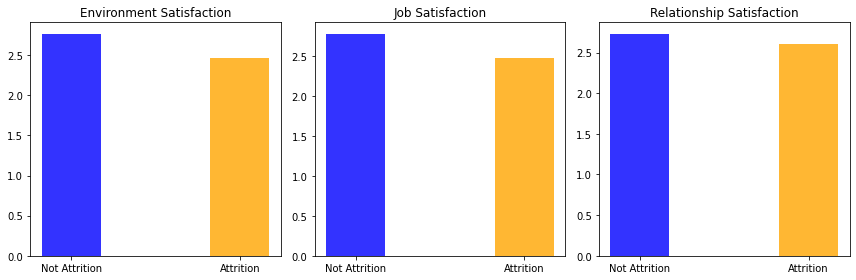

In [16]:
# Create bar graph to show comparison of employee stisfactoin between attrition and not attrition group

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,4))

# Create df for average environment satisfaction, job satisfacion and relationship satisfaction for attrition and not attrition group
employee_es=employee.groupby(['Attrition'])['EnvironmentSatisfaction'].mean()
employee_js=employee.groupby(['Attrition'])['JobSatisfaction'].mean()
employee_rs=employee.groupby(['Attrition'])['RelationshipSatisfaction'].mean()

# Plot bar for environment satisfaction for each group
axes[0].bar(employee_es.index,employee_es.values,width=0.35,color=['blue','orange'],alpha=0.8)
axes[0].set_title('Environment Satisfaction')
axes[0].set_xticklabels(['Not Attrition','Attrition'])

# Plot bar for job satisfaction for each group
axes[1].bar(employee_js.index,employee_js.values,width=0.35,color=['blue','orange'],alpha=0.8)
axes[1].set_title('Job Satisfaction')
axes[1].set_xticklabels(['Not Attrition','Attrition'])

# Plot bar for relationship satisfaction for each group
axes[2].bar(employee_rs.index,employee_rs.values,width=0.35,color=['blue','orange'],alpha=0.8)
axes[2].set_title('Relationship Satisfaction')
axes[2].set_xticklabels(['Not Attrition','Attrition'])

fig.tight_layout()
plt.savefig('satisfaction', dpi = 300)

Insights: For attrition group, employees have lower environment satisfaction, job satisfaction and relationship satisfaction. The difference is more obvious for environment satisfaction and job satisfaction.

In [17]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Feature Engineering

In [18]:
# Change YearsAtCompany to int
# Using astype directly will give an error as there is a special charactor so using apply method with lambda here to remove '!' and convert to int
employee['YearsAtCompany']=employee['YearsAtCompany'].apply(lambda x: int(x.rstrip('!')) if '!' in x else int(x))

In [19]:
cat_var=[feature for feature in employee.columns if employee[feature].dtypes =='O']
for var in cat_var:
  print(employee[var].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Unknown    882
Female     588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Ov

In [20]:
employee['BusinessTravel']=employee['BusinessTravel'].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})

In [21]:
le=LabelEncoder()
employee['Attrition']=le.fit_transform(employee['Attrition'])

In [22]:
cat_var=[feature for feature in employee.columns if employee[feature].dtype=='O']
employee=pd.get_dummies(employee,columns=cat_var)

In [23]:
X=employee.drop(columns=['Attrition'])
y=employee['Attrition']

In [24]:
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=3,stratify=y)

# Modeling

In [5]:
# baseline model
employee['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
baseline=len(employee[employee['Attrition']=='No'])/len(employee)
baseline

0.8387755102040816

In [25]:
scaler=StandardScaler()
sc_xtrain=scaler.fit_transform(X_train)
sc_xtest=scaler.transform(X_test)

In [26]:
logreg=LogisticRegression(solver='liblinear',max_iter=10000)
logreg.fit(X_train,y_train)

print('Training accuracy:', logreg.score(sc_xtrain, y_train))
print('Test accuracy:', logreg.score(sc_xtest, y_test))

Training accuracy: 0.6433756805807622
Test accuracy: 0.6521739130434783


In [27]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l1','l2'],
        'C':[0.0001,0.001,0.1,1,10,20,30,50,100],
        'class_weight':[None,'balanced']}
lrgs=GridSearchCV(logreg,params,cv=5)
lrgs.fit(sc_xtrain,y_train)

print('Training accuracy:', lrgs.score(sc_xtrain, y_train))
print('Test accuracy:', lrgs.score(sc_xtest, y_test))

Training accuracy: 0.9010889292196007
Test accuracy: 0.8668478260869565


In [28]:
lrgs.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [35]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(sc_xtrain,y_train)

print('Training accuracy:', svc.score(sc_xtrain, y_train))
print('Test accuracy:', svc.score(sc_xtest, y_test))

Training accuracy: 0.9237749546279492
Test accuracy: 0.8614130434782609


In [36]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.8559782608695652


In [37]:
n_estimators=[int(x) for x in np.arange(start=10,stop=150,step=10)]
max_features=['auto','sqrt']
max_depth=[2,4,6,8]
min_samples_split=[2,5,7,9]
min_samples_leaf=[1,2]
bootstrap=[True,False]

params={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

# instantiate & fit gridsearch
gs = GridSearchCV(rf,param_grid=params)
gs.fit(X_train, y_train)

print('Training accuracy:', gs.score(X_train, y_train))
print('Test accuracy:', gs.score(X_test, y_test))

Training accuracy: 0.9500907441016334
Test accuracy: 0.8641304347826086


Both Logistic Regression and Randome Forest can perform better than the baseline
Logstic Regression after hyperparameter tuning gives the best accuracy.
